In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%time
df = pd.read_csv("iscxIDS2012.csv")
df.head()

<timed exec>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 29.5 s


,Tag,appName,destination,destinationPayloadAsBase64,destinationPayloadAsUTF,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sensorInterfaceId,...,sourcePayloadAsUTF,sourcePort,sourceTCPFlagsDescription,startDateTime,startTime,stopDateTime,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets
0,Normal,Unknown_UDP,224.0.0.251,NaN,NaN,5353.0,NaN,L2R,udp_ip,NaN,...,NaN,5353.0,NaN,2010-06-13T23:57:19,NaN,2010-06-14T00:11:23,0,0,16076,178
1,Normal,HTTPImageTransfer,206.217.198.186,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,...,NaN,4435.0,"F,A",2010-06-13T23:58:23,NaN,2010-06-14T00:01:24,0,0,384,6
2,Normal,DNS,192.168.5.122,NaN,NaN,53.0,NaN,L2L,udp_ip,NaN,...,NaN,4428.0,NaN,2010-06-13T23:58:31,NaN,2010-06-13T23:59:25,642,4,171,2
3,Normal,HTTPImageTransfer,219.94.203.105,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,...,NaN,3639.0,"F,A",2010-06-13T23:58:31,NaN,2010-06-14T00:00:58,0,0,384,6
4,Normal,HTTPImageTransfer,98.137.80.50,NaN,NaN,80.0,R,L2R,tcp_ip,NaN,...,NaN,3641.0,"F,P,A",2010-06-13T23:58:31,NaN,2010-06-13T23:59:26,128,2,186,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028054 entries, 0 to 2028053
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Tag                             object 
 1   appName                         object 
 2   destination                     object 
 3   destinationPayloadAsBase64      object 
 4   destinationPayloadAsUTF         object 
 5   destinationPort                 float64
 6   destinationTCPFlagsDescription  object 
 7   direction                       object 
 8   protocolName                    object 
 9   sensorInterfaceId               float64
 10  source                          object 
 11  sourceFile                      object 
 12  sourcePayloadAsBase64           object 
 13  sourcePayloadAsUTF              object 
 14  sourcePort                      float64
 15  sourceTCPFlagsDescription       object 
 16  startDateTime                   object 
 17  startTime                  

In [4]:
100 * df.isna().sum()/len(df)

Tag                                0.000049
appName                            0.000000
destination                        0.000049
destinationPayloadAsBase64        57.414201
destinationPayloadAsUTF           57.416962
destinationPort                    0.000049
destinationTCPFlagsDescription    24.024804
direction                          0.000000
protocolName                       0.000049
sensorInterfaceId                 90.530775
source                             0.000049
sourceFile                         0.000049
sourcePayloadAsBase64             52.967623
sourcePayloadAsUTF                57.149169
sourcePort                         0.000049
sourceTCPFlagsDescription         20.982577
startDateTime                      0.000049
startTime                         90.978149
stopDateTime                       0.000049
totalDestinationBytes              0.000000
totalDestinationPackets            0.000000
totalSourceBytes                   0.000000
totalSourcePackets              

In [5]:
100 * df['Tag'].value_counts()/len(df)

Normal    96.602112
Attack     3.397839
Name: Tag, dtype: float64

In [6]:
df.drop(['startTime','sensorInterfaceId'],axis=1,inplace=True)

In [7]:
df[(df['Tag']!='Normal') & (df['Tag']!='Attack')]

,Tag,appName,destination,destinationPayloadAsBase64,destinationPayloadAsUTF,destinationPort,destinationTCPFlagsDescription,direction,protocolName,source,...,sourcePayloadAsBase64,sourcePayloadAsUTF,sourcePort,sourceTCPFlagsDescription,startDateTime,stopDateTime,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets
1357445,NaN,HTTPWeb,NaN,SFRUUC8xLjAgMjAwIE9LDQpTZXJ2ZXI6IFpldXMvNC4zDQ...,"HTTP/1.0 200 OKServer: Zeus/4.3Date: Thu, 17 J...",NaN,NaN,TestbedThuJun17-1Flows.xml,NaN,NaN,...,R0VUIC9wdXJwb3NlL3N1cHBvcnQuc2h0bWwgSFRUUC8xLj...,GET /purpose/support.shtml HTTP/1.1Host: www.k...,NaN,NaN,NaN,NaN,15694,15,786,11


In [8]:
df.drop(df.index[1357445],inplace=True)

In [9]:
100 * df['Tag'].value_counts()/len(df)

Normal    96.60216
Attack     3.39784
Name: Tag, dtype: float64

In [10]:
100 * df.isna().sum()/len(df)

Tag                                0.000000
appName                            0.000000
destination                        0.000000
destinationPayloadAsBase64        57.414229
destinationPayloadAsUTF           57.416991
destinationPort                    0.000000
destinationTCPFlagsDescription    24.024767
direction                          0.000000
protocolName                       0.000000
source                             0.000000
sourceFile                         0.000000
sourcePayloadAsBase64             52.967649
sourcePayloadAsUTF                57.149197
sourcePort                         0.000000
sourceTCPFlagsDescription         20.982538
startDateTime                      0.000000
stopDateTime                       0.000000
totalDestinationBytes              0.000000
totalDestinationPackets            0.000000
totalSourceBytes                   0.000000
totalSourcePackets                 0.000000
dtype: float64

In [11]:
for i in df.select_dtypes(include='object').columns:
    print(f"{i} --> {df[i].nunique()}")

Tag --> 2
appName --> 107
destination --> 34402
destinationPayloadAsBase64 --> 670961
destinationPayloadAsUTF --> 654787
destinationTCPFlagsDescription --> 27
direction --> 4
protocolName --> 6
source --> 2476
sourceFile --> 12
sourcePayloadAsBase64 --> 519865
sourcePayloadAsUTF --> 350521
sourceTCPFlagsDescription --> 23
startDateTime --> 310247
stopDateTime --> 335221


#### Let's focus first on sourceTCPFlagsDescription as it has the least number of nan values in all the columns with missing values

In [12]:
df['sourceTCPFlagsDescription'].unique()

array([nan, 'F,A', 'F,P,A', 'R', 'R,P,A', 'S,R,P,A', 'F,S,P,A', 'S,P,A',
       'S', 'A', 'P,A', 'F,R,A', 'R,A', 'F,S,R,P,A', 'F,S,A', 'F,R,P,A',
       'S,R', 'S,A', 'S,R,A', 'F,S,R,A', 'F,P,U', 'S,R,Illegal7,Illegal8',
       'F,S,R,P,U', 'F,S,P,U'], dtype=object)

In [13]:
def target_enc(x):
    if x=='Normal':
        return 0
    else:
        return 1

In [14]:
df['Tag'] = df['Tag'].apply(target_enc)

In [15]:
df['Tag'].value_counts()

0    1959143
1      68910
Name: Tag, dtype: int64

<AxesSubplot:xlabel='sourceTCPFlagsDescription', ylabel='Tag'>

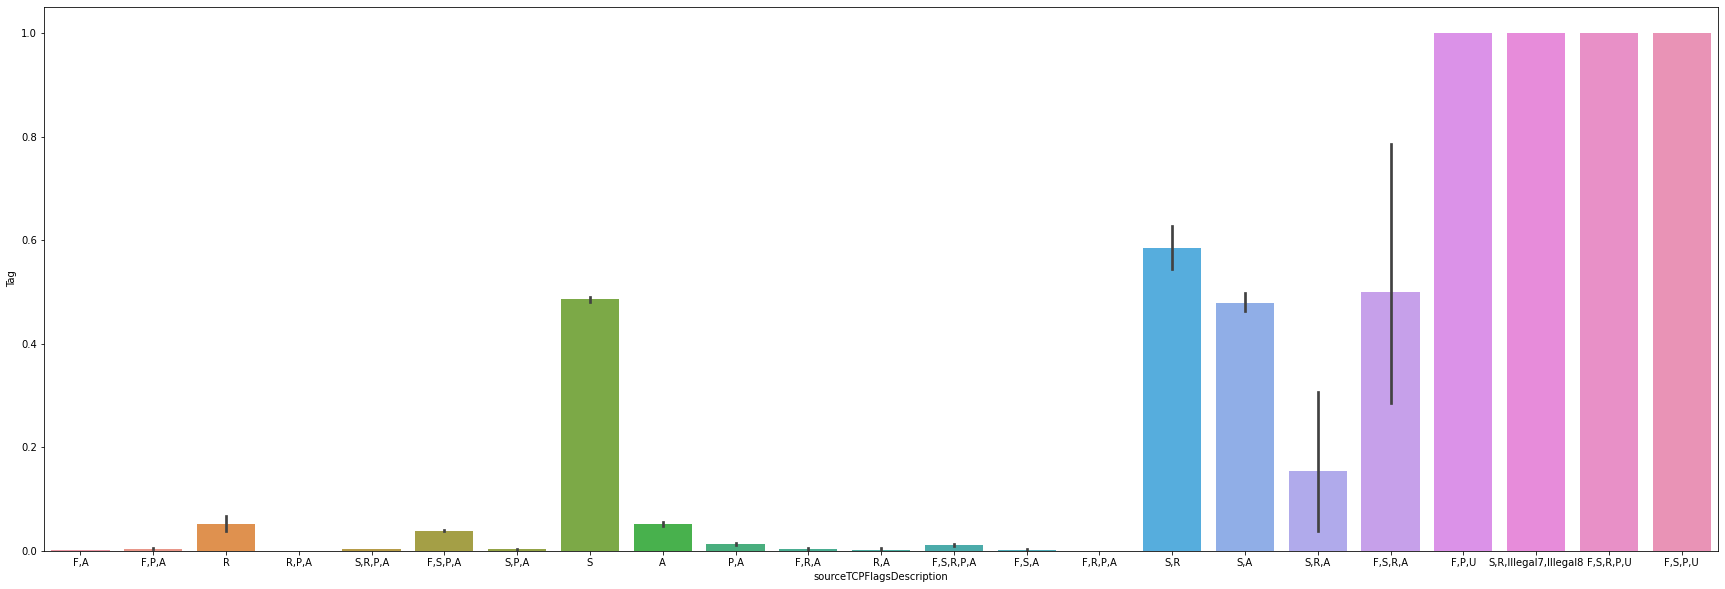

In [16]:
plt.figure(figsize=(30,10))
sns.barplot(x='sourceTCPFlagsDescription',y='Tag',data=df)

In [17]:
df.groupby('sourceTCPFlagsDescription').sum()['Tag'].sort_values(ascending=False)

sourceTCPFlagsDescription
F,S,P,A                  44332
S                        20188
S,A                       1625
A                          788
S,P,A                      469
S,R                        321
P,A                        217
F,A                        164
F,P,A                      106
F,S,R,P,A                   99
S,R,P,A                     95
R                           47
F,S,A                       24
S,R,Illegal7,Illegal8       18
F,R,A                       14
F,P,U                       12
F,S,R,P,U                   10
F,S,R,A                      7
S,R,A                        4
F,S,P,U                      2
R,A                          2
R,P,A                        0
F,R,P,A                      0
Name: Tag, dtype: int64

#### The higher the value in above list, the more ones (Tag = Attack) they have. 'R,P,A' and 'F,R,P,A' have no Attack url

In [18]:
100 * df['sourceTCPFlagsDescription'].value_counts().sort_values(ascending=False)/len(df)

F,S,P,A                  55.887346
S,P,A                     8.954007
F,A                       6.435631
S                         2.049601
S,R,P,A                   1.360517
F,P,A                     1.247206
P,A                       0.819801
A                         0.748748
F,S,A                     0.537757
F,S,R,P,A                 0.440718
F,R,A                     0.229481
S,A                       0.167106
R,A                       0.052267
R                         0.044180
S,R                       0.027070
F,R,P,A                   0.006213
R,P,A                     0.005769
S,R,A                     0.001282
S,R,Illegal7,Illegal8     0.000888
F,S,R,A                   0.000690
F,P,U                     0.000592
F,S,R,P,U                 0.000493
F,S,P,U                   0.000099
Name: sourceTCPFlagsDescription, dtype: float64

#### Let's use chi square test for this

In [19]:
from sklearn.feature_selection import SelectKBest,chi2

In [20]:
bestfeatures = SelectKBest(score_func=chi2,k=5)
fit = bestfeatures.fit(df.select_dtypes(exclude='object').iloc[:1602516,:],df['sourceTCPFlagsDescription'].dropna())

In [21]:
df_scores_1 = pd.DataFrame(fit.scores_)
df_columns_1 = pd.DataFrame(df.select_dtypes(exclude='object').iloc[:1602516,:].columns)

In [22]:
featureScores_1 = pd.concat([df_columns_1,df_scores_1],axis=1)
featureScores_1.columns = ["Specs","Scores"]

In [23]:
featureScores_1.sort_values(by='Scores',ascending=False)

,Specs,Scores
5,totalSourceBytes,8.755824e+08
1,destinationPort,1.948940e+08
3,totalDestinationBytes,1.052411e+08
2,sourcePort,4.727091e+07
4,totalDestinationPackets,1.452930e+05
6,totalSourcePackets,1.029839e+05
0,Tag,1.528972e+03


### Feature encoding BEGINS

In [24]:
df_obj = df.select_dtypes(include='object')

In [25]:
df_obj['direction'].unique()

array(['L2R', 'L2L', 'R2R', 'R2L'], dtype=object)

In [26]:
df_obj.head()

,appName,destination,destinationPayloadAsBase64,destinationPayloadAsUTF,destinationTCPFlagsDescription,direction,protocolName,source,sourceFile,sourcePayloadAsBase64,sourcePayloadAsUTF,sourceTCPFlagsDescription,startDateTime,stopDateTime
0,Unknown_UDP,224.0.0.251,NaN,NaN,NaN,L2R,udp_ip,192.168.5.122,TestbedMonJun14Flows.xml,NaN,NaN,NaN,2010-06-13T23:57:19,2010-06-14T00:11:23
1,HTTPImageTransfer,206.217.198.186,NaN,NaN,NaN,L2R,tcp_ip,192.168.2.111,TestbedMonJun14Flows.xml,NaN,NaN,"F,A",2010-06-13T23:58:23,2010-06-14T00:01:24
2,DNS,192.168.5.122,NaN,NaN,NaN,L2L,udp_ip,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,NaN,2010-06-13T23:58:31,2010-06-13T23:59:25
3,HTTPImageTransfer,219.94.203.105,NaN,NaN,NaN,L2R,tcp_ip,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,"F,A",2010-06-13T23:58:31,2010-06-14T00:00:58
4,HTTPImageTransfer,98.137.80.50,NaN,NaN,R,L2R,tcp_ip,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,"F,P,A",2010-06-13T23:58:31,2010-06-13T23:59:26


In [27]:
df_obj.isna().sum()

appName                                 0
destination                             0
destinationPayloadAsBase64        1164391
destinationPayloadAsUTF           1164447
destinationTCPFlagsDescription     487235
direction                               0
protocolName                            0
source                                  0
sourceFile                              0
sourcePayloadAsBase64             1074212
sourcePayloadAsUTF                1159016
sourceTCPFlagsDescription          425537
startDateTime                           0
stopDateTime                            0
dtype: int64

In [28]:
for i in df_obj.columns:
    print(f"{i} --> {df[i].nunique()}")

appName --> 107
destination --> 34402
destinationPayloadAsBase64 --> 670961
destinationPayloadAsUTF --> 654787
destinationTCPFlagsDescription --> 27
direction --> 4
protocolName --> 6
source --> 2476
sourceFile --> 12
sourcePayloadAsBase64 --> 519865
sourcePayloadAsUTF --> 350521
sourceTCPFlagsDescription --> 23
startDateTime --> 310247
stopDateTime --> 335221


In [29]:
df_obj['appName'].value_counts()[:10]

HTTPWeb               721502
HTTPImageTransfer     707631
DNS                   309359
Unknown_UDP            62669
SecureWeb              56456
NetBIOS-IP             28969
Unknown_TCP            28568
WindowsFileSharing     17848
POP                    16270
IMAP                   13638
Name: appName, dtype: int64

In [30]:
def app_encoder(x):
    if x=='HTTPWeb':
        return 10
    elif x=='HTTPImageTransfer':
        return 9
    elif x=='DNS':
        return 8
    elif x=='Unknown_UDP':
        return 7
    elif x=='SecureWeb':
        return 6
    elif x=='NetBIOS-IP':
        return 5
    elif x=='Unknown_TCP':
        return 4
    elif x=='WindowsFileSharing':
        return 3
    elif x=='POP':
        return 2
    elif x=='IMAP':
        return 1
    else:
        return 0

In [31]:
df_obj['appName'] = df_obj['appName'].apply(app_encoder)

In [32]:
df_obj['appName'].value_counts()

10    721502
9     707631
8     309359
0      65143
7      62669
6      56456
5      28969
4      28568
3      17848
2      16270
1      13638
Name: appName, dtype: int64

In [33]:
df['destination'].value_counts()[:10]

198.164.30.2       228420
192.168.5.122      197748
203.73.24.75       187816
125.6.164.51        99313
67.220.214.50       47913
202.210.143.140     33177
95.211.98.12        25095
82.98.86.183        24766
209.112.44.10       21824
62.140.213.243      20509
Name: destination, dtype: int64

In [34]:
def destination_encoder(x):
    if x=='198.164.30.2':
        return 10
    elif x=='192.168.5.122':
        return 9
    elif x=='203.73.24.75':
        return 8
    elif x=='125.6.164.51':
        return 7
    elif x=='67.220.214.50':
        return 6
    elif x=='202.210.143.140':
        return 5
    elif x=='95.211.98.12':
        return 4
    elif x=='82.98.86.183':
        return 3
    elif x=='209.112.44.10':
        return 2
    elif x=='62.140.213.243':
        return 1
    else:
        return 0

In [35]:
df_obj['destination'] = df_obj['destination'].apply(destination_encoder)

In [36]:
df_obj['destinationPayloadAsBase64'].value_counts()[:10]

KiBPSyBTdGlsbCBoZXJlDQoqIE9LIFN0aWxsIGhlcmUNCg==                                                                                                                                            10953
K09LIERvdmVjb3QgcmVhZHkuDQorT0sgRG92ZWNvdCByZWFkeS4NCitPSw0KK09LDQorT0sgTG9nZ2VkIGluLg0KK09LIExvZ2dlZCBpbi4NCitPSyAwIDANCitPSyAwIDANCitPSyBMb2dnaW5nIG91dC4NCitPSyBMb2dnaW5nIG91dC4NCg==     6345
NTU0LSAoUlRSOkJCKSAgaHR0cDovL3Bvc3RtYXN0ZXIuaW5mby5hb2wuY29tL2Vycm9ycy81NTRydHJiYi5odG1sDQ0KNTU0ICBDb25uZWN0aW5nIElQOiAxNDIuMTY2LjExNS4xNA0NCg==                                             6138
K09LIERvdmVjb3QgcmVhZHkuDQorT0sgRG92ZWNvdCByZWFkeS4NCitPSw0KK09LDQorT0sgTG9nZ2VkIGluLg==                                                                                                     5592
ggAAAAAAAFX/U01CcgAAAACYU8gAAAAAAAAAAAAAAAAAAP/+AAAAABEFAAMKAAEABBEAAAAAAQAAAAAA/eMAgA==                                                                                                     4705
NTU0LSAoUlRSOkJCKSAgaHR0cDovL3

In [37]:
df_obj['destinationPayloadAsUTF'].value_counts()[:10]

* OK Still here* OK Still here                                                                                          10953
+OK Dovecot ready.+OK Dovecot ready.+OK+OK+OK Logged in.+OK Logged in.+OK 0 0+OK 0 0+OK Logging out.+OK Logging out.     6345
554- (RTR:BB)  http://postmaster.info.aol.com/errors/554rtrbb.html554  Connecting IP: 142.166.115.14                     6138
+OK Dovecot ready.+OK Dovecot ready.+OK+OK+OK Logged in.                                                                 5592
.U.SMBr.S.............                                                                                                   4705
554- (RTR:BB)  http://postmaster.info.aol.com/errors/554rtrbb.ht                                                         2465
HTTP/1.1 301 Moved PermanentlyConnection: closeContent-Lengt                                                             1785
* OK [CAPABILITY IMAP4rev1 LITERAL+ SASL-IR LOGIN-REFERRALS ID E                                                      

In [40]:
#df_obj.drop(['destinationPayloadAsUTF','destinationPayloadAsBase64'],axis=1,inplace=True)

In [41]:
df_obj.columns

Index(['appName', 'destination', 'destinationTCPFlagsDescription', 'direction',
       'protocolName', 'source', 'sourceFile', 'sourcePayloadAsBase64',
       'sourcePayloadAsUTF', 'sourceTCPFlagsDescription', 'startDateTime',
       'stopDateTime'],
      dtype='object')

In [43]:
df_obj['destinationTCPFlagsDescription'].value_counts()[:10]

F,S,P,A      1114613
F,S,R,P,A     118824
S,P,A          95817
F,A            69651
R,A            30755
P,A            26563
R              20643
F,P,A          14273
F,S,A          13544
S,A            10322
Name: destinationTCPFlagsDescription, dtype: int64

In [44]:
def TCPFD_enc(x):
    if x=='F,S,P,A ':
        return 10
    elif x=='F,S,R,P,A':
        return 9
    elif x=='S,P,A ':
        return 8
    elif x=='F,A':
        return 7
    elif x=='R,A':
        return 6
    elif x=='P,A':
        return 5
    elif x=='R':
        return 4
    elif x=='F,P,A':
        return 3
    elif x=='F,S,A':
        return 2
    elif x=='S,A':
        return 1
    else:
        return 0    

In [45]:
df_obj['destinationTCPFlagsDescription'] = df_obj['destinationTCPFlagsDescription'].apply(TCPFD_enc)

In [52]:
df_obj['destinationTCPFlagsDescription'].value_counts()

0    1723478
9     118824
7      69651
6      30755
5      26563
4      20643
3      14273
2      13544
1      10322
Name: destinationTCPFlagsDescription, dtype: int64

In [46]:
df['direction'].value_counts()

L2R    1745961
L2L     262509
R2L      18040
R2R       1543
Name: direction, dtype: int64

In [47]:
def direction_enc(x):
    if x=='L2R':
        return 10
    elif x=='L2L':
        return 9
    elif x=='R2L':
        return 8
    elif x=='R2R':
        return 7

In [48]:
df_obj['direction'] = df_obj['direction'].apply(direction_enc)

In [51]:
df_obj['direction'].value_counts()

10    1745961
9      262509
8       18040
7        1543
Name: direction, dtype: int64

In [50]:
df_obj['sourceFile'].value_counts()[:10]

TestbedSunJun13Flows.xml      275528
TestbedWedJun16-3Flows.xml    196924
TestbedTueJun15-3Flows.xml    196034
TestbedTueJun15-1Flows.xml    192041
TestbedTueJun15-2Flows.xml    183623
TestbedWedJun16-1Flows.xml    182968
TestbedMonJun14Flows.xml      171380
TestbedThuJun17-2Flows.xml    149625
TestbedThuJun17-1Flows.xml    142534
TestbedWedJun16-2Flows.xml    142371
Name: sourceFile, dtype: int64

In [55]:
def sourceFile_enc(x):
    if x=='TestbedSunJun13Flows.xml':
        return 10
    elif x=='TestbedWedJun16-3Flows.xml':
        return 9
    elif x=='TestbedTueJun15-3Flows.xml':
        return 8
    elif x=='TestbedTueJun15-1Flows.xml':
        return 7
    elif x=='TestbedTueJun15-2Flows.xml':
        return 6
    elif x=='TestbedWedJun16-1Flows.xml':
        return 5
    elif x=='TestbedMonJun14Flows.xml':
        return 4
    elif x=='TestbedThuJun17-2Flows.xml':
        return 3
    elif x=='TestbedThuJun17-1Flows.xml':
        return 2
    elif x=='TestbedWedJun16-2Flows.xml':
        return 1
    else:
        return 0


In [56]:
df_obj['sourceFile'] = df_obj['sourceFile'].apply(sourceFile_enc)

In [57]:
df_obj['sourceFile'].value_counts()

10    275528
9     196924
8     196034
0     195025
7     192041
6     183623
5     182968
4     171380
3     149625
2     142534
1     142371
Name: sourceFile, dtype: int64

In [58]:
df_obj.columns

Index(['appName', 'destination', 'destinationTCPFlagsDescription', 'direction',
       'protocolName', 'source', 'sourceFile', 'sourcePayloadAsBase64',
       'sourcePayloadAsUTF', 'sourceTCPFlagsDescription', 'startDateTime',
       'stopDateTime'],
      dtype='object')

In [65]:
def str_len_calc(x):
    if pd.isnull(x):
        return x
    else:
        return len(x)

In [66]:
df_obj['sourcePayloadAsBase64_Len'] = df_obj['sourcePayloadAsBase64'].apply(str_len_calc)

In [68]:
df_obj['sourcePayloadAsUTF_Len'] = df_obj['sourcePayloadAsUTF'].apply(str_len_calc)

In [ ]:
#df_obj.drop(['destinationPayloadAsUTF','destinationPayloadAsBase64'],axis=1,inplace=True)

In [69]:
df_obj['destinationPayloadAsUTF_Len'] = df['destinationPayloadAsBase64'].apply(str_len_calc)

In [70]:
df_obj['destinationPayloadAsUTF_Len'] = df['destinationPayloadAsUTF'].apply(str_len_calc)

In [72]:
df['sourceTCPFlagsDescription'].value_counts()

F,S,P,A                  1133425
S,P,A                     181592
F,A                       130518
S                          41567
S,R,P,A                    27592
F,P,A                      25294
P,A                        16626
A                          15185
F,S,A                      10906
F,S,R,P,A                   8938
F,R,A                       4654
S,A                         3389
R,A                         1060
R                            896
S,R                          549
F,R,P,A                      126
R,P,A                        117
S,R,A                         26
S,R,Illegal7,Illegal8         18
F,S,R,A                       14
F,P,U                         12
F,S,R,P,U                     10
F,S,P,U                        2
Name: sourceTCPFlagsDescription, dtype: int64

In [74]:
def source_TCPFlag_encoder(x):
    if x=='F,S,P,A':
        return 10
    elif x=='S,P,A ':
        return 9
    elif x=='F,A':
        return 8
    elif x=='S':
        return 7
    elif x=='S,R,P,A':
        return 6
    elif x=='F,P,A ':
        return 5
    elif x=='P,A':
        return 4
    elif x=='A':
        return 3
    elif x=='F,S,A':
        return 2
    elif x=='F,S,R,P,A ':
        return 1
    else:
        return 0


In [75]:
df_obj['sourceTCPFlagsDescription'] = df_obj['sourceTCPFlagsDescription'].apply(source_TCPFlag_encoder)

In [77]:
df_obj['sourceTCPFlagsDescription'].value_counts()

10    1133425
0      652234
8      130518
7       41567
6       27592
4       16626
3       15185
2       10906
Name: sourceTCPFlagsDescription, dtype: int64

In [78]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2028053 entries, 0 to 2028053
Data columns (total 15 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   appName                         int64  
 1   destination                     int64  
 2   destinationTCPFlagsDescription  int64  
 3   direction                       int64  
 4   protocolName                    object 
 5   source                          object 
 6   sourceFile                      int64  
 7   sourcePayloadAsBase64           object 
 8   sourcePayloadAsUTF              object 
 9   sourceTCPFlagsDescription       int64  
 10  startDateTime                   object 
 11  stopDateTime                    object 
 12  sourcePayloadAsBase64_Len       float64
 13  sourcePayloadAsUTF_Len          float64
 14  destinationPayloadAsUTF_Len     float64
dtypes: float64(3), int64(6), object(6)
memory usage: 247.6+ MB


In [79]:
df_obj.drop(['startDateTime','stopDateTime'],axis=1,inplace=True)

In [80]:
df['protocolName'].value_counts()

tcp_ip      1605779
udp_ip       413985
icmp_ip        8149
igmp             75
ip               64
ipv6icmp          1
Name: protocolName, dtype: int64

In [81]:
def protocol_Name_enc(x):
    if x=='tcp_ip':
        return 3
    elif x=='udp_ip':
        return 2
    elif x=='icmp_ip':
        return 1
    else:
        return 0

In [82]:
df_obj['protocolName'] = df_obj['protocolName'].apply(protocol_Name_enc)

In [83]:
df_obj['protocolName'].value_counts()

3    1605779
2     413985
1       8149
0        140
Name: protocolName, dtype: int64

In [85]:
df_obj['source'].value_counts()[:10]

192.168.5.122    263828
192.168.2.107    204440
192.168.4.118    131402
192.168.1.101    115587
192.168.4.121    104555
192.168.1.105    100034
192.168.2.109     98504
192.168.2.110     89709
192.168.3.116     89274
192.168.3.115     88424
Name: source, dtype: int64

In [87]:
x1 = df_obj['source'][0]

In [94]:
x1.split('.')

['192', '168', '5', '122']

In [93]:
df_obj['source-1'] = df_obj['source'].apply(lambda x: x.split('.')[0])

In [95]:
df_obj['source-2'] = df_obj['source'].apply(lambda x: x.split('.')[1])
df_obj['source-3'] = df_obj['source'].apply(lambda x: x.split('.')[2])
df_obj['source-4'] = df_obj['source'].apply(lambda x: x.split('.')[3])

In [96]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2028053 entries, 0 to 2028053
Data columns (total 17 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   appName                         int64  
 1   destination                     int64  
 2   destinationTCPFlagsDescription  int64  
 3   direction                       int64  
 4   protocolName                    int64  
 5   source                          object 
 6   sourceFile                      int64  
 7   sourcePayloadAsBase64           object 
 8   sourcePayloadAsUTF              object 
 9   sourceTCPFlagsDescription       int64  
 10  sourcePayloadAsBase64_Len       float64
 11  sourcePayloadAsUTF_Len          float64
 12  destinationPayloadAsUTF_Len     float64
 13  source-1                        object 
 14  source-2                        object 
 15  source-3                        object 
 16  source-4                        object 
dtypes: float64(3), int64(7), ob

In [98]:
df_obj.drop('source',axis=1,inplace=True)

In [100]:
df_obj['source-1'] = df_obj['source-1'].astype(np.int64)
df_obj['source-2'] = df_obj['source-2'].astype(np.int64)
df_obj['source-3'] = df_obj['source-3'].astype(np.int64)
df_obj['source-4'] = df_obj['source-4'].astype(np.int64)

In [102]:
df_obj.drop(['sourcePayloadAsBase64','sourcePayloadAsUTF'],axis=1,inplace=True)

In [103]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2028053 entries, 0 to 2028053
Data columns (total 14 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   appName                         int64  
 1   destination                     int64  
 2   destinationTCPFlagsDescription  int64  
 3   direction                       int64  
 4   protocolName                    int64  
 5   sourceFile                      int64  
 6   sourceTCPFlagsDescription       int64  
 7   sourcePayloadAsBase64_Len       float64
 8   sourcePayloadAsUTF_Len          float64
 9   destinationPayloadAsUTF_Len     float64
 10  source-1                        int64  
 11  source-2                        int64  
 12  source-3                        int64  
 13  source-4                        int64  
dtypes: float64(3), int64(11)
memory usage: 232.1 MB


### fEATURE ENCODING ENDS

In [105]:
100 * df_obj.isna().sum()/len(df_obj)

appName                            0.000000
destination                        0.000000
destinationTCPFlagsDescription     0.000000
direction                          0.000000
protocolName                       0.000000
sourceFile                         0.000000
sourceTCPFlagsDescription          0.000000
sourcePayloadAsBase64_Len         52.967649
sourcePayloadAsUTF_Len            57.149197
destinationPayloadAsUTF_Len       57.416991
source-1                           0.000000
source-2                           0.000000
source-3                           0.000000
source-4                           0.000000
dtype: float64

#### Let's use chi square test for this

In [19]:
from sklearn.feature_selection import SelectKBest,chi2

In [20]:
bestfeatures = SelectKBest(score_func=chi2,k=5)
fit = bestfeatures.fit(df.select_dtypes(exclude='object').iloc[:1602516,:],df['sourceTCPFlagsDescription'].dropna())

In [21]:
df_scores_1 = pd.DataFrame(fit.scores_)
df_columns_1 = pd.DataFrame(df.select_dtypes(exclude='object').iloc[:1602516,:].columns)

In [22]:
featureScores_1 = pd.concat([df_columns_1,df_scores_1],axis=1)
featureScores_1.columns = ["Specs","Scores"]

In [23]:
featureScores_1.sort_values(by='Scores',ascending=False)

,Specs,Scores
5,totalSourceBytes,8.755824e+08
1,destinationPort,1.948940e+08
3,totalDestinationBytes,1.052411e+08
2,sourcePort,4.727091e+07
4,totalDestinationPackets,1.452930e+05
6,totalSourcePackets,1.029839e+05
0,Tag,1.528972e+03
